In [2]:
%matplotlib inline
from img_utils import show_image

Before passing your image to TractSeg two things have to be considered:

1. TractSeg requires the input image to have the same orientation as MNI space. An easy way to ensure this is rigid registration to MNI space.
2. The gradients can have a flipped sign along one dimension.


### 1. Rigid registration to MNI space

The following code can be used to rigidly align your diffusion image with MNI space.

In [ ]:
!calc_FA -i Diffusion.nii.gz -o FA.nii.gz --bvals Diffusion.bvals --bvecs Diffusion.bvecs \
!--brain_mask nodif_brain_mask.nii.gz

!flirt -ref tractseg/resources/MNI_FA_template.nii.gz -in FA.nii.gz \
!-out FA_MNI.nii.gz -omat FA_2_MNI.mat -dof 6 -cost mutualinfo -searchcost mutualinfo

!flirt -ref tractseg/resources/MNI_FA_template.nii.gz -in Diffusion.nii.gz \
!-out Diffusion_MNI.nii.gz -applyxfm -init FA_2_MNI.mat -dof 6
!cp Diffusion.bvals Diffusion_MNI.bvals
!cp Diffusion.bvecs Diffusion_MNI.bvecs

### 2. Flipped peaks
Looking at the following peaks we can see that they seem to be inverted:

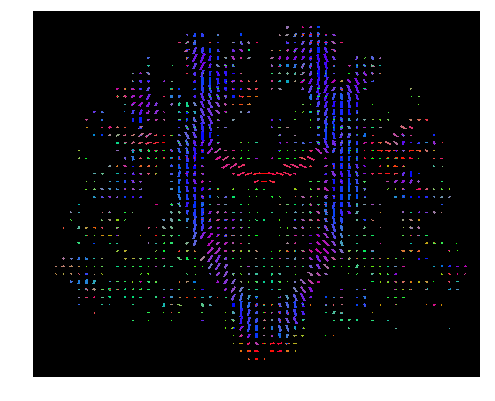

In [5]:
show_image("screenshots/peaks_inverted.png")

When flipping the sign of the x-axis they look right again. TractSeg provides a command line tool for flipping the peaks:
```
flip_peaks -i peak_inverted.nii.gz -o peaks_correct.nii.gz -a x
```

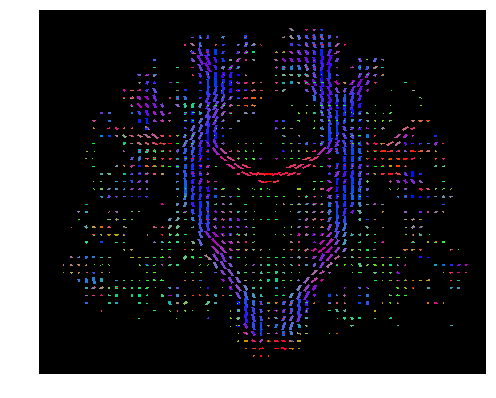

In [6]:
show_image("screenshots/peaks.png")